# Mean
Arithmetic mean $\bar{x} = \mu = \mu_x$

$$ \bar{x} = n^{-1} \Sigma_{i=1}^{n} x_i$$

Suitable for normally distributed data

# Median

$$ x_i, i = \frac{n+1}{2}$$

# Mode

Most common value

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


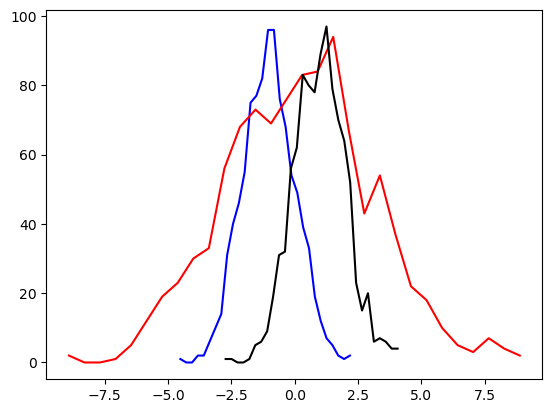

In [2]:
N = 1000
nbins = 30

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:] + x1[:-1])/2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:] + x2[:-1])/2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:] + x3[:-1])/2

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'k')

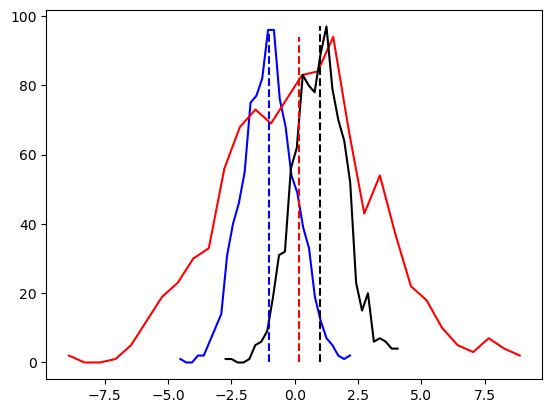

In [3]:
# overlay the mean
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot(x1,y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1],[0,max(y1)], 'b--')
plt.plot([mean_d2, mean_d2],[0,max(y2)], 'r--')
plt.plot([mean_d3, mean_d3],[0,max(y3)], 'k--')

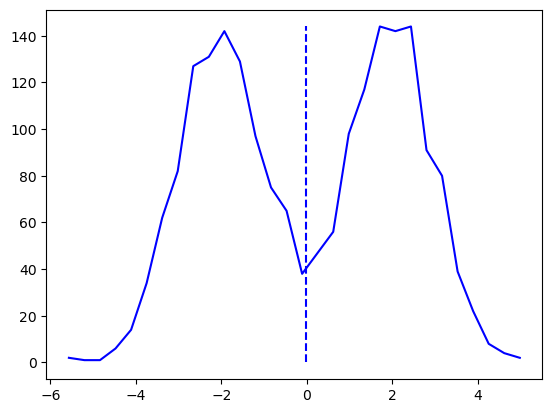

In [4]:
## failure of the mean

d4 = np.hstack((np.random.randn(N)-2, np.random.randn(N)+2))
[y4,x4] = np.histogram(d4, nbins)

x4 = (x4[:-1] + x4[1:])/2

mean_d4 = np.mean(d4)

plt.plot(x4, y4, 'b')
plt.plot([mean_d4, mean_d4],[0, max(y4)],'b--')

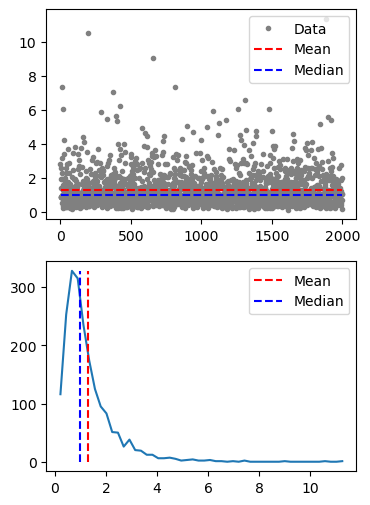

In [6]:
## median
shift   = 0
stretch = .7
n       = 2000
nbins   = 50

# log normal distribution
data = stretch*np.random.randn(n) + shift
data = np.exp(data)

y,x = np.histogram(data, nbins)
x = (x[:-1]+x[1:])/2

datamean = np.mean(data)
datamedian = np.median(data)

fig,ax = plt.subplots(2,1, figsize=(4,6))
ax[0].plot(data, '.', color=[.5,.5,.5], label='Data')
ax[0].plot([1,n], [datamean, datamean], 'r--', label='Mean')
ax[0].plot([1,n], [datamedian, datamedian], 'b--', label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean, datamean],[0, max(y)], 'r--', label='Mean')
ax[1].plot([datamedian, datamedian],[0, max(y)], 'b--', label='Median')
ax[1].legend()

In [7]:
## mode

data = np.round(np.random.randn(10))

uniq_data = np.unique(data)
for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {sum(data==uniq_data[i])} times')


print(' ')
print('The modal value is %g'%stats.mode(data)[0][0])

-1.0 appears 2 times
-0.0 appears 5 times
1.0 appears 2 times
2.0 appears 1 times
 
The modal value is -0


/var/folders/v0/gk1p00xd7sx91qnxby0v4_0m0000gn/T/ipykernel_50258/1140806184.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The modal value is %g'%stats.mode(data)[0][0])
